In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn import metrics

import h2o
from h2o.automl import H2OAutoML

from catboost import CatBoostClassifier

In [461]:
# We read the dataframe describing the meaning of the columns
df_info = pd.read_csv("columns_meaning.csv", index_col=0)
df_info

,Description
Column,
0,Case_ID registered in Hospital
1,Unique code for the Hospital
2,Unique code for the type of Hospital
3,City Code of the Hospital
4,Region Code of the Hospital
5,Number of Extra rooms available in the Hospital
6,Department overlooking the case
7,Code for the Ward type
8,Code for the Ward Facility


In [462]:
# We read the hospital data
df_train = pd.read_csv("hospital_train.csv", index_col=0)
df_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,,,,,,,,,,,,,,,,,
161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40


In [463]:
# To better work with the dataframe we changed the name, currently as strings, with the information provied in the columns_meaning dataframe
new_columns =(df_info.values.tolist())
new_columns
flat_list = [item for sublist in new_columns for item in sublist]

In [464]:
df_train.rename(columns=dict(zip(df_train.columns, flat_list[1:])), inplace=True)
df_train

,Unique code for the Hospital,Unique code for the type of Hospital,City Code of the Hospital,Region Code of the Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Deposit at the Admission Time,Stay Days by the patient
0,,,,,,,,,,,,,,,,,
161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40


In [465]:
df_train_reduced = df_train.drop(["Unique code for the Hospital", "Region Code of the Hospital", "City Code of the Hospital", "Unique Patient Id", "Deposit at the Admission Time"], axis =1)
df_train_reduced

,Unique code for the type of Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Stay Days by the patient
0,,,,,,,,,,,,
161528,a,2,gynecology,R,F,4.0,2.0,Urgent,Moderate,2,21-30,0-10
159472,a,4,gynecology,Q,F,2.0,15.0,Trauma,Moderate,4,51-60,21-30
309765,c,2,anesthesia,S,F,3.0,5.0,Urgent,Moderate,2,71-80,11-20
279614,f,3,gynecology,S,B,4.0,6.0,Emergency,Moderate,4,11-20,51-60
147791,a,3,gynecology,S,E,2.0,8.0,Urgent,Moderate,2,51-60,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...
237869,a,3,gynecology,R,B,3.0,3.0,Emergency,Moderate,6,51-60,More than 100 Days
254763,b,2,gynecology,R,F,2.0,5.0,Urgent,Moderate,3,21-30,51-60
69788,a,3,gynecology,Q,F,3.0,2.0,Trauma,Minor,2,31-40,31-40


In [466]:
# Change categorical columns to numericals

# Unique code for the type of Hospital
print(df_train_reduced["Unique code for the type of Hospital"].unique())

# Department overlooking the case
print(df_train_reduced["Department overlooking the case"].unique())

# This columns will be converted with dummies to numerical data to use them in the model

['a' 'c' 'f' 'b' 'd' 'e' 'g']
['gynecology' 'anesthesia' 'radiotherapy' 'TB & Chest disease' 'surgery']


In [467]:
features = df_train_reduced[["Unique code for the type of Hospital", "Department overlooking the case"]]
features = pd.get_dummies(features)

In [468]:
df_train_reduced.drop(columns=["Unique code for the type of Hospital", "Department overlooking the case"], axis=1, inplace=True)

In [469]:
df_train_reduced = pd.concat([df_train_reduced, features], axis=1)
df_train_reduced.head()

,Number of Extra rooms available in the Hospital,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Stay Days by the patient,...,Unique code for the type of Hospital_c,Unique code for the type of Hospital_d,Unique code for the type of Hospital_e,Unique code for the type of Hospital_f,Unique code for the type of Hospital_g,Department overlooking the case_TB & Chest disease,Department overlooking the case_anesthesia,Department overlooking the case_gynecology,Department overlooking the case_radiotherapy,Department overlooking the case_surgery
0,,,,,,,,,,,,,,,,,,,,,
161528,2,R,F,4.0,2.0,Urgent,Moderate,2,21-30,0-10,...,0,0,0,0,0,0,0,1,0,0
159472,4,Q,F,2.0,15.0,Trauma,Moderate,4,51-60,21-30,...,0,0,0,0,0,0,0,1,0,0
309765,2,S,F,3.0,5.0,Urgent,Moderate,2,71-80,11-20,...,1,0,0,0,0,0,1,0,0,0
279614,3,S,B,4.0,6.0,Emergency,Moderate,4,11-20,51-60,...,0,0,0,1,0,0,0,1,0,0
147791,3,S,E,2.0,8.0,Urgent,Moderate,2,51-60,51-60,...,0,0,0,0,0,0,0,1,0,0


In [470]:
print(df_train_reduced["Code for the Ward type"].unique())
print(df_train_reduced["Code for the Ward Facility"].unique())

# We asume these columns have been randomly coded and therefore they are not releted with the target. They are dropped.
df_train_reduced.drop(["Code for the Ward type", "Code for the Ward Facility", "City Code for the patient", "Number of Visitors with the patient"], axis=1, inplace=True)

['R' 'Q' 'S' 'P' 'T' 'U']
['F' 'B' 'E' 'C' 'D' 'A']


In [471]:
# conversing categorical columns to numeric

# Admission Type registered by the Hospital
print(df_train_reduced["Admission Type registered by the Hospital"].unique())

df_train_reduced["Admission Type registered by the Hospital"] = df_train_reduced["Admission Type registered by the Hospital"].replace({'Urgent': 2, 'Trauma': 1, 'Emergency': 3})

# Severity of the illness recorded at the time of admission
print(df_train_reduced["Severity of the illness recorded at the time of admission"].unique())

df_train_reduced["Severity of the illness recorded at the time of admission"] = df_train_reduced["Severity of the illness recorded at the time of admission"].replace({'Moderate': 2, 'Extreme': 3, 'Minor': 1})

# Age of the patient
print(df_train_reduced["Age of the patient"].unique())

le = preprocessing.LabelEncoder()
data = df_train_reduced["Age of the patient"].values
df_train_reduced["Age of the patient"] = le.fit_transform(data)

['Urgent' 'Trauma' 'Emergency']
['Moderate' 'Extreme' 'Minor']
['21-30' '51-60' '71-80' '11-20' '31-40' '0-10' '61-70' '41-50' '81-90'
 '91-100']


In [472]:
df_train_reduced.head()

,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Age of the patient,Stay Days by the patient,Unique code for the type of Hospital_a,Unique code for the type of Hospital_b,Unique code for the type of Hospital_c,Unique code for the type of Hospital_d,Unique code for the type of Hospital_e,Unique code for the type of Hospital_f,Unique code for the type of Hospital_g,Department overlooking the case_TB & Chest disease,Department overlooking the case_anesthesia,Department overlooking the case_gynecology,Department overlooking the case_radiotherapy,Department overlooking the case_surgery
0,,,,,,,,,,,,,,,,,,
161528,2,4.0,2,2,2,0-10,1,0,0,0,0,0,0,0,0,1,0,0
159472,4,2.0,1,2,5,21-30,1,0,0,0,0,0,0,0,0,1,0,0
309765,2,3.0,2,2,7,11-20,0,0,1,0,0,0,0,0,1,0,0,0
279614,3,4.0,3,2,1,51-60,0,0,0,0,0,1,0,0,0,1,0,0
147791,3,2.0,2,2,5,51-60,1,0,0,0,0,0,0,0,0,1,0,0


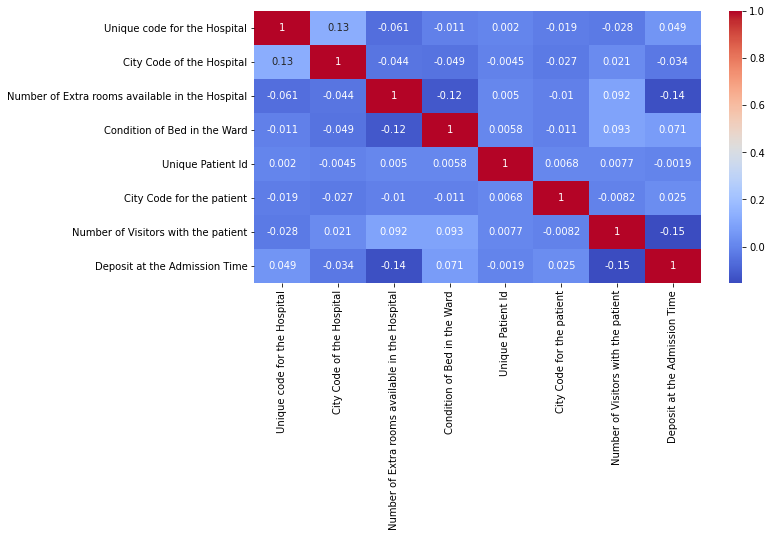

In [473]:
# Once all (assumed) relevant data has been converted to digits we can check the correlation between all columns

# Correlation matrix shows there is no clear relation between values
plt.figure(figsize = (10,5))
sns.heatmap(df_train.corr(),annot = True , cmap = "coolwarm")
plt.show()

In [474]:
# We check if there are Nan in the dataframe
df_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 161528 to 69647
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Number of Extra rooms available in the Hospital            100000 non-null  int64  
 1   Condition of Bed in the Ward                               99967 non-null   float64
 2   Admission Type registered by the Hospital                  100000 non-null  int64  
 3   Severity of the illness recorded at the time of admission  100000 non-null  int64  
 4   Age of the patient                                         100000 non-null  int32  
 5   Stay Days by the patient                                   100000 non-null  object 
 6   Unique code for the type of Hospital_a                     100000 non-null  uint8  
 7   Unique code for the type of Hospital_b                     100000 non-null  uin

In [475]:
# We check the percentage of nan values per column
percentage = df_train_reduced["Condition of Bed in the Ward"].isna().sum() * 100 / len(df_train_reduced)
print(f"The column 'Condition of Bed in the Ward' has {percentage}% of values as nan")

The column 'Condition of Bed in the Ward' has 0.033% of values as nan


In [476]:
# We cannot replace the nan with other values as we would be assuming their value so we remove rows with nans
df_train_reduced["Condition of Bed in the Ward"].unique()
df_train_reduced = df_train_reduced.fillna(0)

In [477]:
df_train_reduced.head()

,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Age of the patient,Stay Days by the patient,Unique code for the type of Hospital_a,Unique code for the type of Hospital_b,Unique code for the type of Hospital_c,Unique code for the type of Hospital_d,Unique code for the type of Hospital_e,Unique code for the type of Hospital_f,Unique code for the type of Hospital_g,Department overlooking the case_TB & Chest disease,Department overlooking the case_anesthesia,Department overlooking the case_gynecology,Department overlooking the case_radiotherapy,Department overlooking the case_surgery
0,,,,,,,,,,,,,,,,,,
161528,2,4.0,2,2,2,0-10,1,0,0,0,0,0,0,0,0,1,0,0
159472,4,2.0,1,2,5,21-30,1,0,0,0,0,0,0,0,0,1,0,0
309765,2,3.0,2,2,7,11-20,0,0,1,0,0,0,0,0,1,0,0,0
279614,3,4.0,3,2,1,51-60,0,0,0,0,0,1,0,0,0,1,0,0
147791,3,2.0,2,2,5,51-60,1,0,0,0,0,0,0,0,0,1,0,0


## 2. Defining X and y

In [478]:
X = df_train_reduced.drop(["Stay Days by the patient"], axis=1)
y = df_train_reduced["Stay Days by the patient"]

In [389]:
X.shape

(100000, 17)

In [390]:
y = np.array(y).reshape(-1,1)

In [391]:
X_train.shape

(79973, 17)

In [392]:
y_train.shape

(79973, 1)

## 3. Dividing X_train, X_test, y_train, y_test

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## 4. Model selection

In [394]:
# Voting with RandomForest & CatBoost
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
cat_clf = CatBoostClassifier(random_state=42, logging_level="Silent")

estimators = [("forest", rnd_clf), ("cat", cat_clf)]

voting_clf = VotingClassifier(estimators, voting="soft")
voting_clf.fit(X_train, y_train)

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(random_state=42)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001560F9898C8>)],
                 voting='soft')

In [395]:
    rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    cat_clf = CatBoostClassifier(random_state=42, logging_level="Silent")
    grad_clf = GradientBoostingClassifier(n_estimators = 100, random_state=42)

    estimators = [("cat", cat_clf), ("grad", grad_clf)]

    voting_clf_1 = VotingClassifier(estimators, voting="soft")
    voting_clf_1.fit(X_train, y_train)

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x00000155C3696188>),
                             ('grad',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [396]:
from sklearn.ensemble import GradientBoostingClassifier

# Voting with RandomForest & CatBoost & GradientBoost
def ensemble_models(models):

    rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    cat_clf = CatBoostClassifier(random_state=42, logging_level="Silent")
    grad_clf = GradientBoostingClassifier(n_estimators = 100, random_state=42)

    estimators = models

    voting_clf_1 = VotingClassifier(estimators, voting="soft")
    voting_clf_1.fit(X_train, y_train)

In [397]:
ensemble_models([("forest", rnd_clf), ("grad", grad_clf)])

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [398]:
from sklearn.metrics import accuracy_score

def voting_prediction(models):
    
    for clf in (models):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print (clf.__class__.__name__, metrics.accuracy_score(y_test, y_pred.ravel()))
        

In [399]:
voting_prediction(models=(rnd_clf, grad_clf, voting_clf))

ipykernel_launcher:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
RandomForestClassifier 0.27895
C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
GradientBoostingClassifier 0.31625
C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
VotingClassifier 0.29365


In [400]:
# Function to remove unnecesary elements
import gc
gc.collect()

17128

## H2O

In [422]:
h2o.init()
h2train = h2o.H2OFrame(df_train_reduced)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,40 mins 59 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_Usuario_21z13p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.838 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [424]:
columns = [a for a in h2train.columns if a != "Stay Days by the patient"][1:]
x = columns

In [425]:
automl = H2OAutoML(max_models=50, seed=42, max_runtime_secs=300, sort_metric="mean_per_class_error")
automl.train(x=x, y="Stay Days by the patient", training_frame=h2train)

AutoML progress: |█
21:08:44.670: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████Failed polling AutoML progress log: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\Usuario\\AppData\\Local\\Temp\\tmp4hc3t655.csv'
████████████| 100%


In [426]:
print("[INFO] Models leader board:")
leader_board = automl.leaderboard
leader_board.head()

[INFO] Models leader board:


model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
GBM_grid__1_AutoML_20210625_210844_model_2,0.814106,1.68142,0.769568,0.592235,nan,nan
StackedEnsemble_AllModels_AutoML_20210625_210844,0.814661,1.66258,0.766989,0.588272,nan,nan
StackedEnsemble_BestOfFamily_AutoML_20210625_210844,0.814895,1.66694,0.768142,0.590042,nan,nan
GBM_4_AutoML_20210625_210844,0.817354,1.81825,0.818629,0.670154,nan,nan
GBM_grid__1_AutoML_20210625_210844_model_4,0.817482,2.03501,0.862149,0.743301,nan,nan
GBM_grid__1_AutoML_20210625_210844_model_1,0.817918,1.67042,0.771605,0.595374,nan,nan
GBM_2_AutoML_20210625_210844,0.817932,1.74903,0.800702,0.641124,nan,nan
GBM_1_AutoML_20210625_210844,0.819065,1.75502,0.802476,0.643968,nan,nan
GBM_5_AutoML_20210625_210844,0.823243,1.88283,0.834648,0.696637,nan,nan
DRF_1_AutoML_20210625_210844,0.823351,5.75227,0.776752,0.603344,nan,nan


In [444]:
h2test = h2o.H2OFrame(X_pred_reduced)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [445]:
predictions = automl.leader.predict(h2test)

gbm prediction progress: |████████████████████████████████████████████████| 100%
C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset is missing column 'Number of Visitors with the patient': substituting in a column of NaN
  warnings.warn(w)


## 7. Train the model with all available data

In [428]:
X_pred = pd.read_csv("hospital_test.csv", index_col=0)
X_pred.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0


In [429]:
# Same transformations than before to X_pred are carried out
X_pred.rename(columns=dict(zip(X_pred.columns, flat_list[1:])), inplace=True)

X_pred_reduced = X_pred.drop(["Unique code for the Hospital", "Region Code of the Hospital", "City Code of the Hospital", "Unique Patient Id", "Deposit at the Admission Time", "Number of Visitors with the patient"], axis =1)

features_pred = X_pred_reduced[["Unique code for the type of Hospital", "Department overlooking the case"]]
features_pred = pd.get_dummies(features_pred)

In [431]:
X_pred_reduced.drop(columns=["Unique code for the type of Hospital", "Department overlooking the case", "Code for the Ward type", "Code for the Ward Facility", "City Code for the patient"], axis=1, inplace=True)

X_pred_reduced = pd.concat([X_pred_reduced, features_pred], axis=1)

In [430]:
X_pred_reduced["Admission Type registered by the Hospital"] = X_pred_reduced["Admission Type registered by the Hospital"].replace({'Urgent': 2, 'Trauma': 1, 'Emergency': 3})

X_pred_reduced["Severity of the illness recorded at the time of admission"] = X_pred_reduced["Severity of the illness recorded at the time of admission"].replace({'Moderate': 2, 'Extreme': 3, 'Minor': 1})

le = preprocessing.LabelEncoder()
data_pred = X_pred_reduced["Age of the patient"].values
X_pred_reduced["Age of the patient"] = le.fit_transform(data_pred)

X_pred_reduced = X_pred_reduced.fillna(0)

In [443]:
X_pred_reduced

,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Age of the patient,Unique code for the type of Hospital_a,Unique code for the type of Hospital_b,Unique code for the type of Hospital_c,Unique code for the type of Hospital_d,Unique code for the type of Hospital_e,Unique code for the type of Hospital_f,Unique code for the type of Hospital_g,Department overlooking the case_TB & Chest disease,Department overlooking the case_anesthesia,Department overlooking the case_gynecology,Department overlooking the case_radiotherapy,Department overlooking the case_surgery
0,,,,,,,,,,,,,,,,,
314114,4,2.0,3,1,4,1,0,0,0,0,0,0,0,0,1,0,0
208989,3,2.0,1,2,3,0,0,1,0,0,0,0,0,0,1,0,0
305872,4,4.0,3,1,7,0,0,0,0,1,0,0,0,0,1,0,0
266099,4,2.0,2,3,3,0,0,1,0,0,0,0,1,0,0,0,0
13228,4,1.0,3,1,2,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318155,6,3.0,2,1,5,0,0,0,1,0,0,0,0,1,0,0,0
144850,2,2.0,3,2,6,1,0,0,0,0,0,0,0,0,1,0,0
180676,3,3.0,1,1,3,0,0,1,0,0,0,0,0,0,1,0,0


## 8. Prediction with all data

In [433]:
voting_clf.fit(X, y)

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(random_state=42)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001560F9898C8>)],
                 voting='soft')

In [434]:
predictions_submit = voting_clf.predict(X_pred_reduced)
predictions_submit

array(['11-20', '21-30', '21-30', ..., '11-20', '21-30', '21-30'],
      dtype=object)

## **Submission to Kaggle**


In [435]:
sample = pd.read_csv("sample_submission.csv")

In [436]:
sample.head()

,id,days
0,314114,11-20
1,208989,31-40
2,305872,81-90
3,266099,21-30
4,13228,31-40


In [437]:
predictions_submit

array(['11-20', '21-30', '21-30', ..., '11-20', '21-30', '21-30'],
      dtype=object)

In [438]:
submission = pd.DataFrame({"id": sample["id"], "days": predictions_submit})
submission

,id,days
0,314114,11-20
1,208989,21-30
2,305872,21-30
3,266099,51-60
4,13228,0-10
...,...,...
133739,318155,11-20
133740,144850,11-20
133741,180676,11-20
133742,39933,21-30


## 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.


In [439]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [440]:
chequeator(submission)

You're ready to submit!
